In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

file = 'AQI.csv'
data = pd.read_csv(file)

In [2]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,24-01-2023 04:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,24-01-2023 05:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,24-01-2023 06:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,24-01-2023 07:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [3]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [4]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


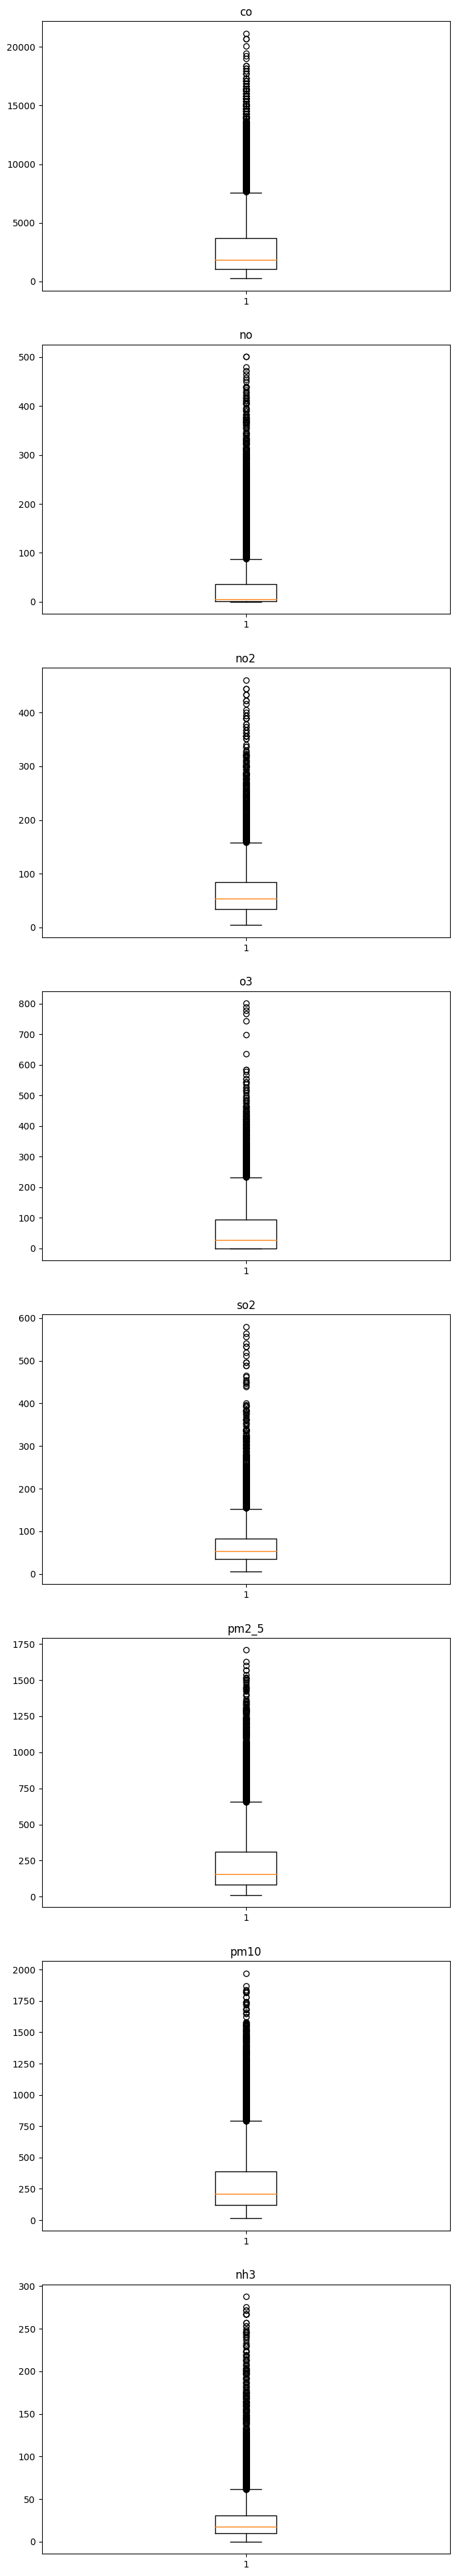

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8, 50))

for i, pollutant in enumerate(data.columns.drop('date')):
    ax = fig.add_subplot(8, 1, i+1)
    ax.boxplot(data[pollutant])
    plt.title(pollutant)
    
plt.show()

In [6]:
# let's create some features


import datetime

def create(df):
    df['date'] = pd.to_datetime(data['date'])

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X=df[['year', 'month', 'day', 'hour', 'dayofweek', 'weekday', 'quarter', 'dayofyear',
      'dayofmonth', 'weekofyear']]
    
    return X


In [7]:
X = create(data)
X

C:\Users\acer\AppData\Local\Temp\ipykernel_8232\1400594598.py:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


,year,month,day,hour,dayofweek,weekday,quarter,dayofyear,dayofmonth,weekofyear
0,2020,11,25,1,2,Wednesday,4,330,25,48
1,2020,11,25,2,2,Wednesday,4,330,25,48
2,2020,11,25,3,2,Wednesday,4,330,25,48
3,2020,11,25,4,2,Wednesday,4,330,25,48
4,2020,11,25,5,2,Wednesday,4,330,25,48
...,...,...,...,...,...,...,...,...,...,...
18771,2023,1,24,4,1,Tuesday,1,24,24,4
18772,2023,1,24,5,1,Tuesday,1,24,24,4
18773,2023,1,24,6,1,Tuesday,1,24,24,4
18774,2023,1,24,7,1,Tuesday,1,24,24,4


In [8]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,hour,dayofweek,weekday,quarter,dayofyear,dayofmonth,weekofyear
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,25,1,2,Wednesday,4,330,25,48
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,25,2,2,Wednesday,4,330,25,48
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020,11,25,3,2,Wednesday,4,330,25,48
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020,11,25,4,2,Wednesday,4,330,25,48
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020,11,25,5,2,Wednesday,4,330,25,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,2023,1,24,4,1,Tuesday,1,24,24,4
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,2023,1,24,5,1,Tuesday,1,24,24,4
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,2023,1,24,6,1,Tuesday,1,24,24,4
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,2023,1,24,7,1,Tuesday,1,24,24,4


In [9]:
data = data.set_index('date')
data

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,hour,dayofweek,weekday,quarter,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,25,1,2,Wednesday,4,330,25,48
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,25,2,2,Wednesday,4,330,25,48
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020,11,25,3,2,Wednesday,4,330,25,48
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020,11,25,4,2,Wednesday,4,330,25,48
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020,11,25,5,2,Wednesday,4,330,25,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,2023,1,24,4,1,Tuesday,1,24,24,4
2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,2023,1,24,5,1,Tuesday,1,24,24,4
2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,2023,1,24,6,1,Tuesday,1,24,24,4


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18776 entries, 2020-11-25 01:00:00 to 2023-01-24 08:00:00
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   co          18776 non-null  float64
 1   no          18776 non-null  float64
 2   no2         18776 non-null  float64
 3   o3          18776 non-null  float64
 4   so2         18776 non-null  float64
 5   pm2_5       18776 non-null  float64
 6   pm10        18776 non-null  float64
 7   nh3         18776 non-null  float64
 8   year        18776 non-null  int64  
 9   month       18776 non-null  int64  
 10  day         18776 non-null  int64  
 11  hour        18776 non-null  int64  
 12  dayofweek   18776 non-null  int64  
 13  weekday     18776 non-null  object 
 14  quarter     18776 non-null  int64  
 15  dayofyear   18776 non-null  int64  
 16  dayofmonth  18776 non-null  int64  
 17  weekofyear  18776 non-null  int64  
dtypes: float64(8), int64(9), object

In [11]:
#add seasons

seasons = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring',
          6: 'summer', 7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'fall',
           12: 'winter'
          }
data['seasons'] = data['month'].map(seasons)

In [12]:
# let's try calculations for CO

data_new=data.copy()

In [13]:
mean_weekday = data_new.groupby('weekday')['co'].mean()
data_new['weekday'] = data_new['weekday'].map(mean_weekday)

In [14]:
ohe = pd.get_dummies(data_new['seasons'], prefix='seasons', drop_first=True)
data_new = pd.concat((data_new.drop('seasons', axis=1), ohe), axis=1)

In [15]:
data_new

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,...,hour,dayofweek,weekday,quarter,dayofyear,dayofmonth,weekofyear,seasons_spring,seasons_summer,seasons_winter
date,,,,,,,,,,,,,,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,...,1,2,2912.170653,4,330,25,48,0,0,0
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,...,2,2,2912.170653,4,330,25,48,0,0,0
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020,11,...,3,2,2912.170653,4,330,25,48,0,0,0
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020,11,...,4,2,2912.170653,4,330,25,48,0,0,0
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020,11,...,5,2,2912.170653,4,330,25,48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,2023,1,...,4,1,2935.279441,1,24,24,4,0,0,1
2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,2023,1,...,5,1,2935.279441,1,24,24,4,0,0,1
2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,2023,1,...,6,1,2935.279441,1,24,24,4,0,0,1


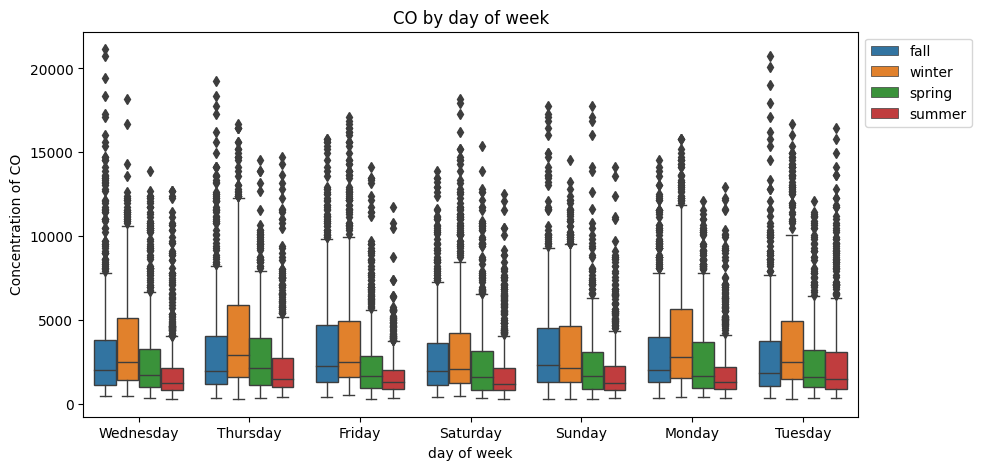

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = data,
            x='weekday',
            y='co',
            hue='seasons',
            ax=ax,
            linewidth=1
            )
ax.set_title('CO by day of week')
ax.set_xlabel('day of week')
ax.set_ylabel("Concentration of CO")
ax.legend(bbox_to_anchor=(1,1))
plt.show()

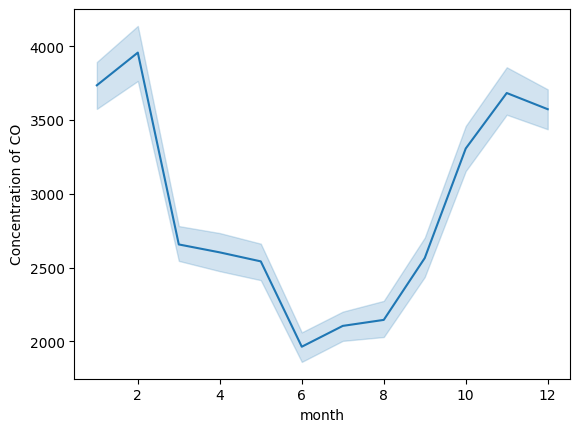

In [17]:
sns.lineplot(x='month', y='co', data=data)

plt.xlabel('month')
plt.ylabel('Concentration of CO')

plt.show()

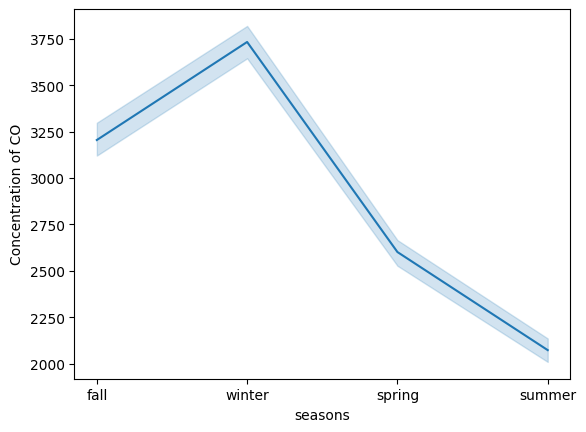

In [18]:
sns.lineplot(x='seasons', y='co', data=data)

plt.xlabel('seasons')
plt.ylabel('Concentration of CO')

plt.show()

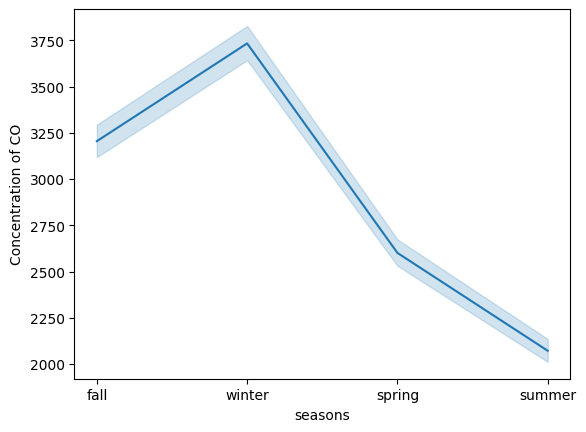

In [19]:
sns.lineplot(x='seasons', y='co', data=data)

plt.xlabel('seasons')
plt.ylabel('Concentration of CO')

plt.show()

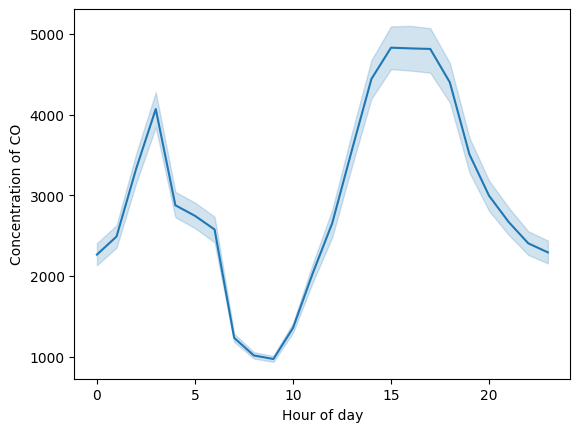

In [20]:
sns.lineplot(x='hour', y='co', data=data)

plt.xlabel('Hour of day')
plt.ylabel('Concentration of CO')

plt.show()

In [21]:
def averages(x):
    mean = data.groupby(x)['co'].mean()
    sns.barplot(data = data,x=mean.index,y= mean.values)
    plt.xlabel(x)
    plt.ylabel("Concentration of CO")
    
plt.show()

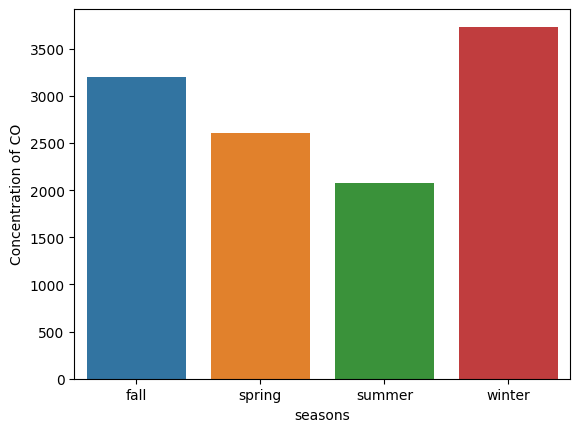

In [22]:
averages('seasons')

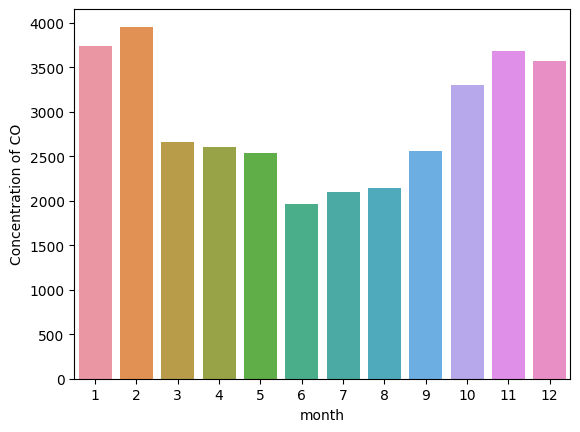

In [23]:
averages('month')

In [24]:
X = data_new.drop('co', axis=1)
y = data_new['co']

<Axes: >

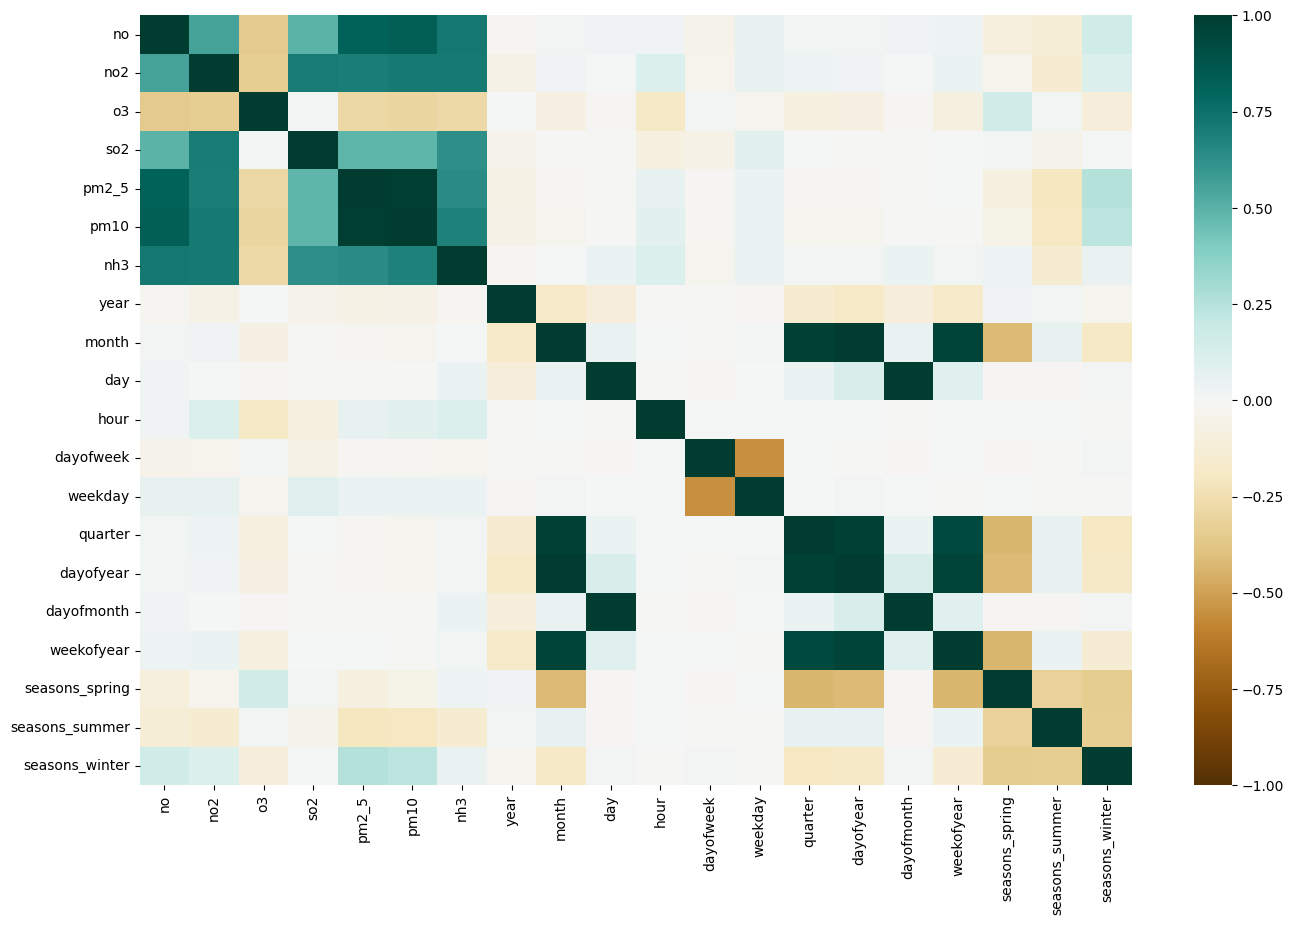

In [25]:
# searching for correlations

fig = plt.figure()
fig.set_size_inches(16, 10)

corr = X.corr()
sns.heatmap(corr, xticklabels=X.columns, yticklabels=X.columns,
           vmin=-1, vmax=1, cmap='BrBG')

In [26]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 20))

Top Absolute Correlations
day        dayofmonth    1.000000
month      dayofyear     0.996668
pm2_5      pm10          0.989291
month      quarter       0.972886
quarter    dayofyear     0.969711
dayofyear  weekofyear    0.957022
month      weekofyear    0.956458
quarter    weekofyear    0.935135
no         pm10          0.829910
           pm2_5         0.816441
           nh3           0.724342
no2        nh3           0.718399
           pm10          0.711998
           so2           0.710371
           pm2_5         0.701840
pm10       nh3           0.686081
pm2_5      nh3           0.644446
so2        nh3           0.628444
no         no2           0.557712
dayofweek  weekday       0.551589
dtype: float64


In [27]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    
correlation(X, 0.9)

In [28]:
#searching for constant features

from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=1)
var.fit(X)

var.get_feature_names_out()


array(['no', 'no2', 'o3', 'so2', 'pm2_5', 'nh3', 'month', 'day', 'hour',
       'dayofweek', 'weekday'], dtype=object)

In [29]:
X

,no,no2,o3,so2,pm2_5,nh3,year,month,day,hour,dayofweek,weekday,seasons_spring,seasons_summer,seasons_winter
date,,,,,,,,,,,,,,,
2020-11-25 01:00:00,2.18,70.60,13.59,38.62,364.61,28.63,2020,11,25,1,2,2912.170653,0,0,0
2020-11-25 02:00:00,23.25,89.11,0.33,54.36,420.96,41.04,2020,11,25,2,2,2912.170653,0,0,0
2020-11-25 03:00:00,52.75,100.08,1.11,68.67,463.68,49.14,2020,11,25,3,2,2912.170653,0,0,0
2020-11-25 04:00:00,50.96,111.04,6.44,78.20,454.81,48.13,2020,11,25,4,2,2912.170653,0,0,0
2020-11-25 05:00:00,42.92,117.90,17.17,87.74,448.14,46.61,2020,11,25,5,2,2912.170653,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24 04:00:00,4.64,37.01,33.26,30.52,231.15,6.27,2023,1,24,4,1,2935.279441,0,0,1
2023-01-24 05:00:00,6.82,34.96,46.49,34.33,225.08,9.12,2023,1,24,5,1,2935.279441,0,0,1
2023-01-24 06:00:00,8.16,40.10,56.51,43.39,242.49,12.54,2023,1,24,6,1,2935.279441,0,0,1


In [30]:
from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

In [31]:
for train_index, test_index in splitter.split(X):
        X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)], y[len(train_index): (len(train_index)+len(test_index))]

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

linear_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('linear_regression', LinearRegression())
])

linear_pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean absolute error is', mean_absolute_error(y_test, linear_pipe.predict(X_test)))

Mean absolute error is 274.7885497152859


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

GradientBoostingRegressor()

In [35]:
print('Mean absolute error is', mean_absolute_error(y_test, xgb.predict(X_test)))

Mean absolute error is 230.33825708707155


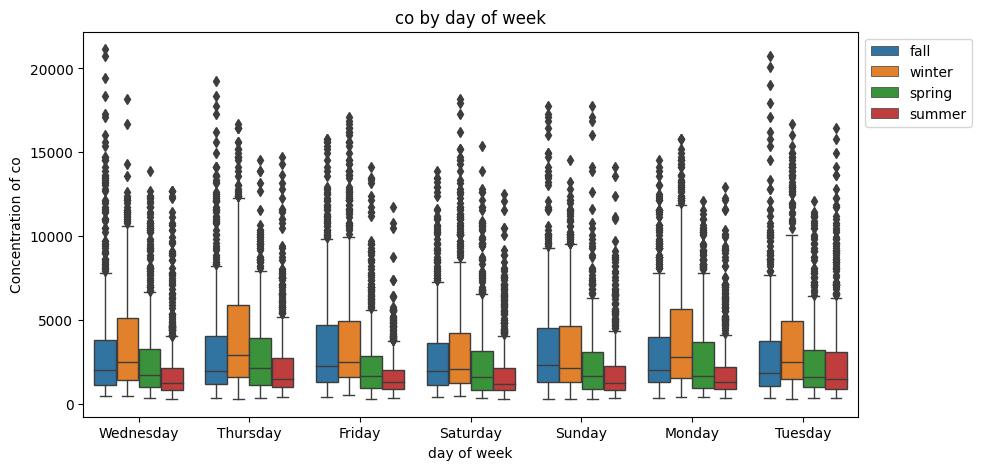

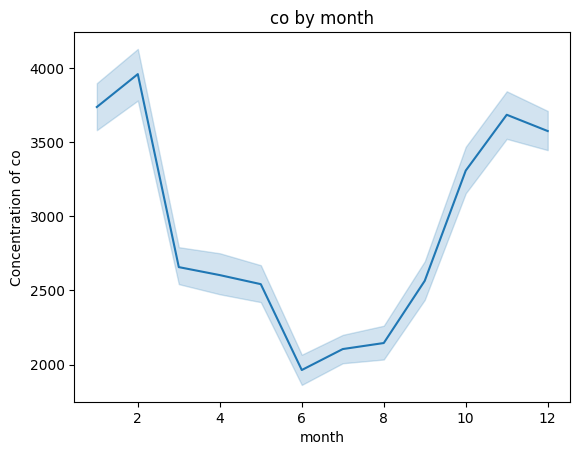

minimum value 1963.6781518817204 at 6
maximum value 3957.623823099415 at 2


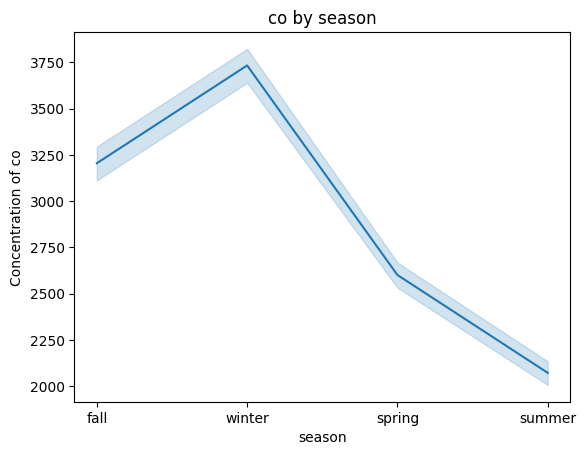

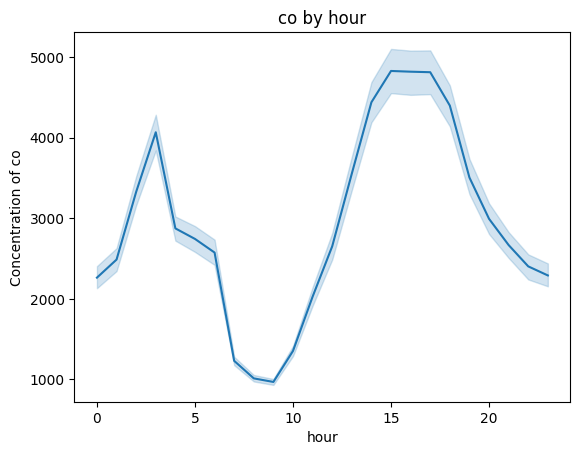

minimum value 969.2230051150896 at 9
maximum value 4828.601393861893 at 15
****************************************************************************************************


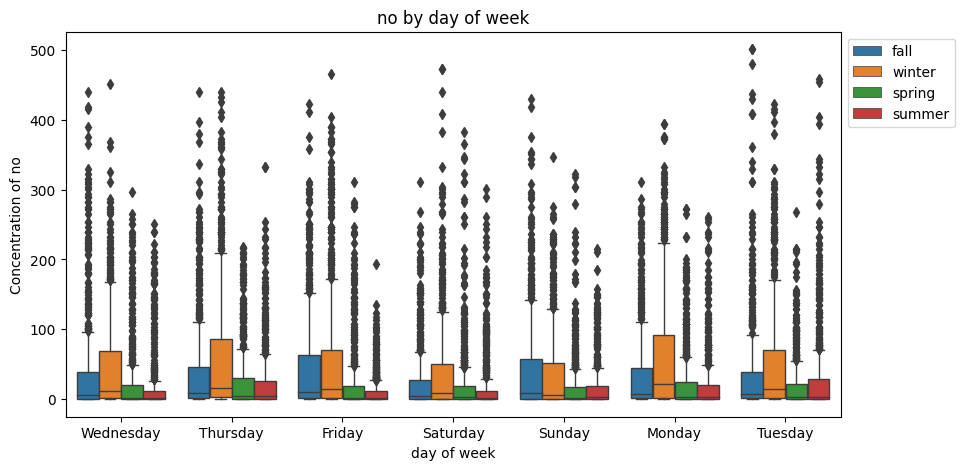

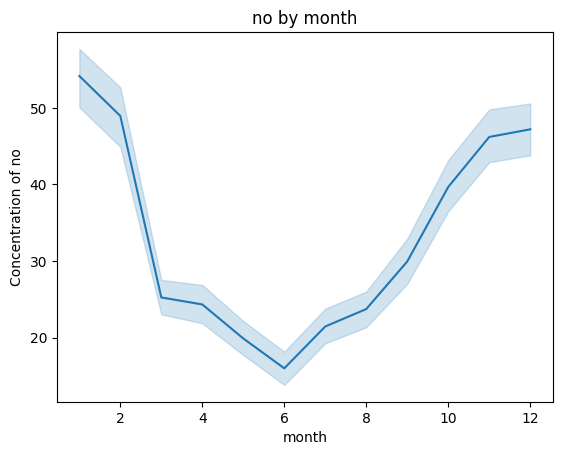

minimum value 15.979818548387097 at 6
maximum value 54.16721181147076 at 1


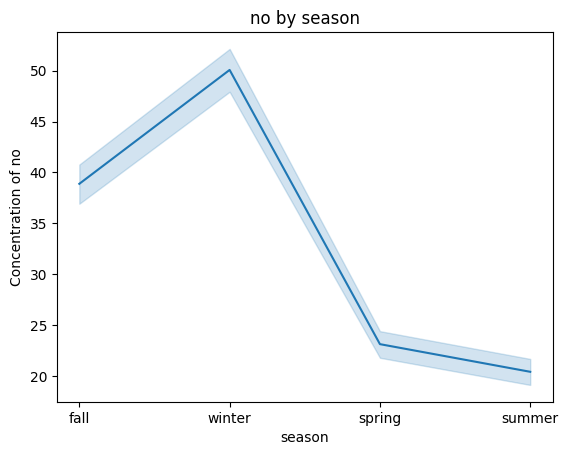

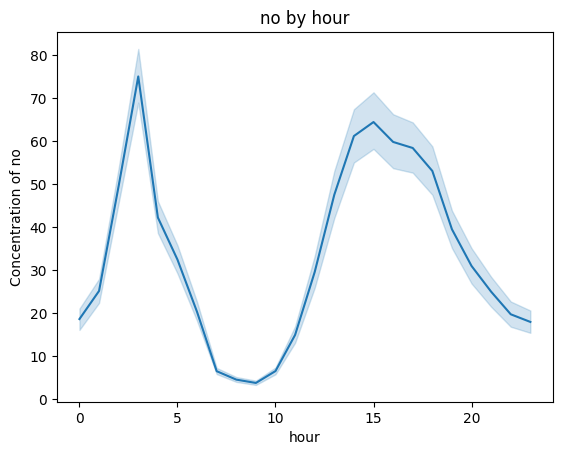

minimum value 3.8305242966751916 at 9
maximum value 75.05480204342274 at 3
****************************************************************************************************


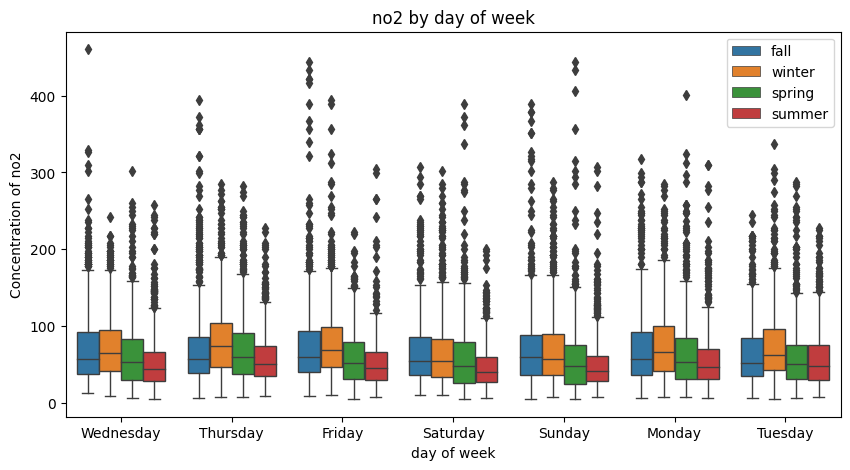

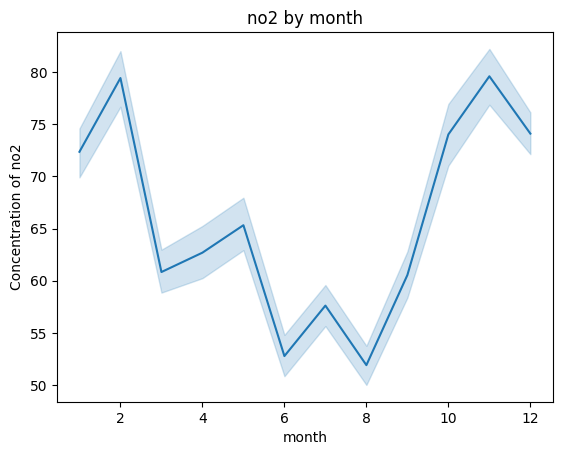

minimum value 51.90004557291667 at 8
maximum value 79.6081717791411 at 11


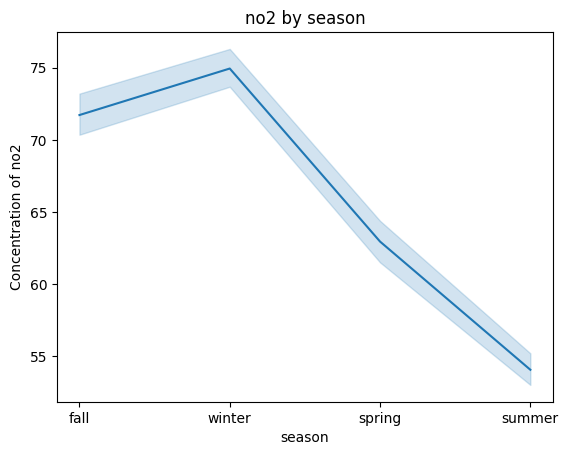

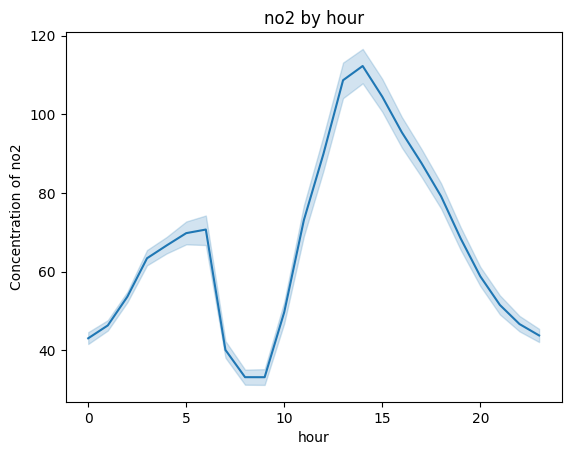

minimum value 33.1590537084399 at 9
maximum value 112.27150895140664 at 14
****************************************************************************************************


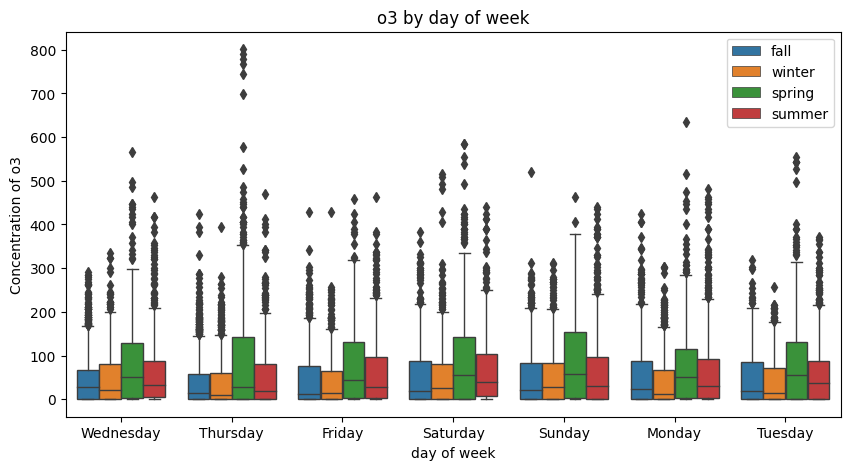

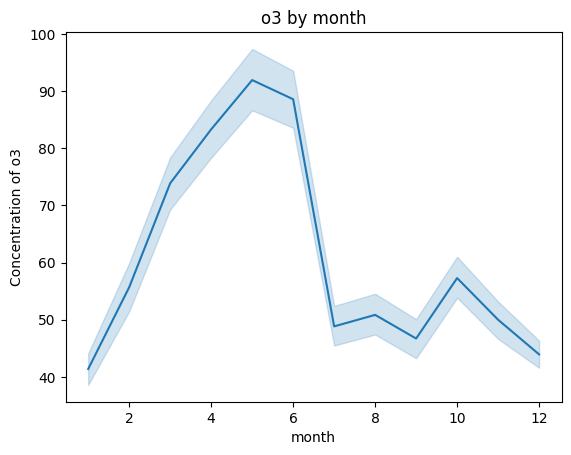

minimum value 41.369579784213514 at 1
maximum value 91.92139973958332 at 5


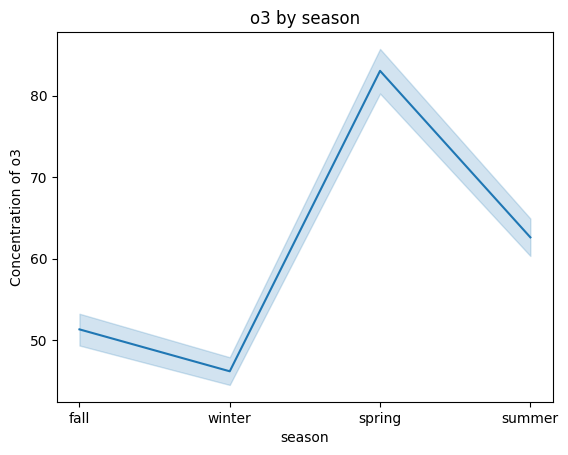

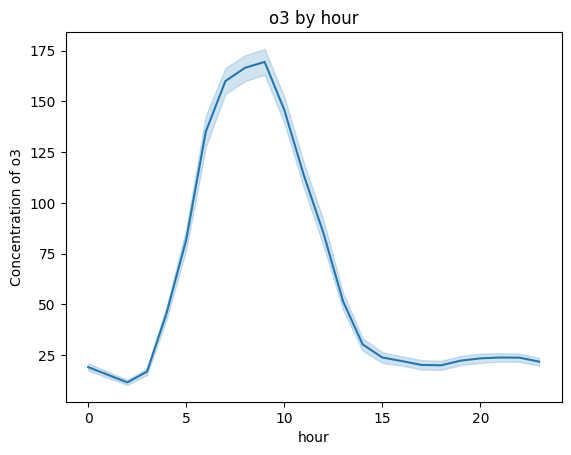

minimum value 11.522464878671775 at 2
maximum value 169.40365728900255 at 9
****************************************************************************************************


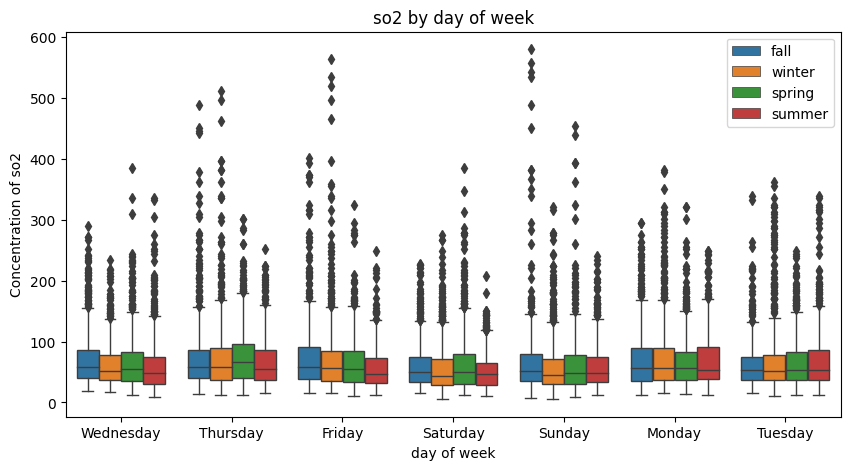

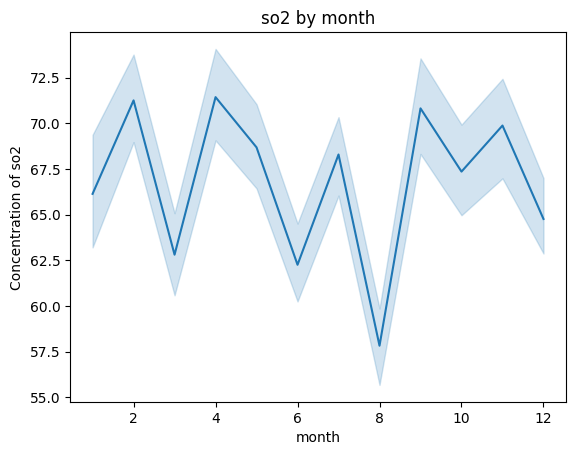

minimum value 57.82634765625 at 8
maximum value 71.43334005376344 at 4


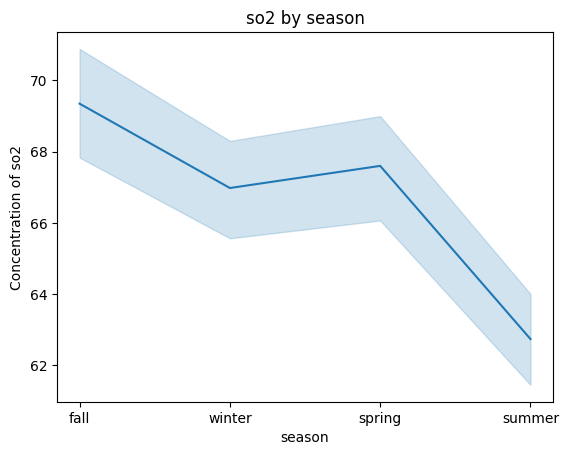

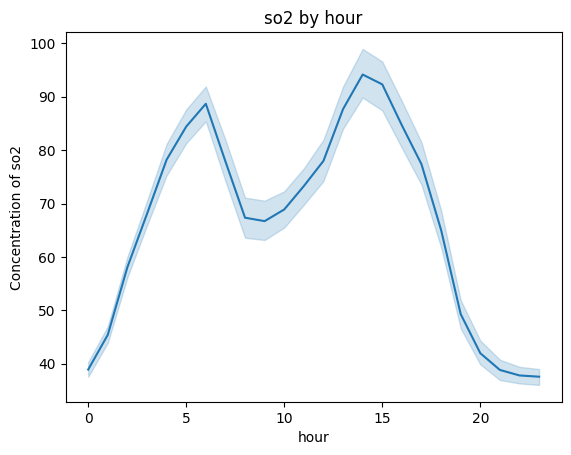

minimum value 37.57031969309463 at 23
maximum value 94.1583759590793 at 14
****************************************************************************************************


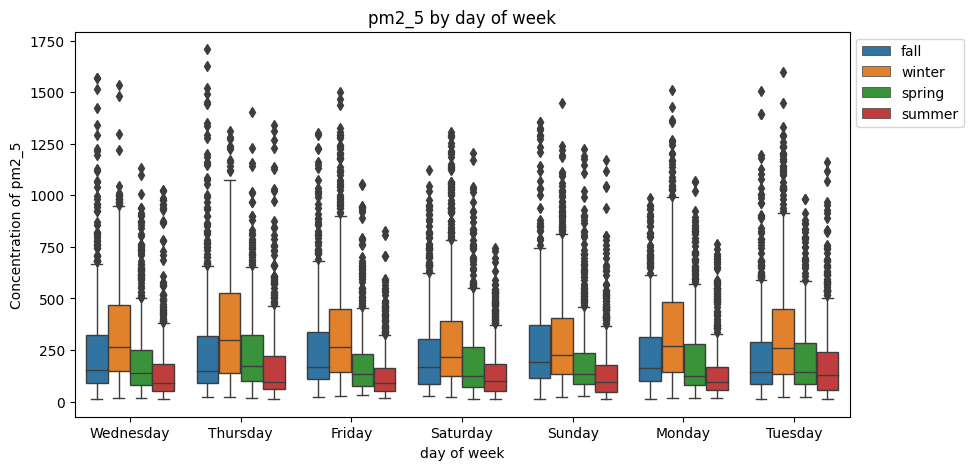

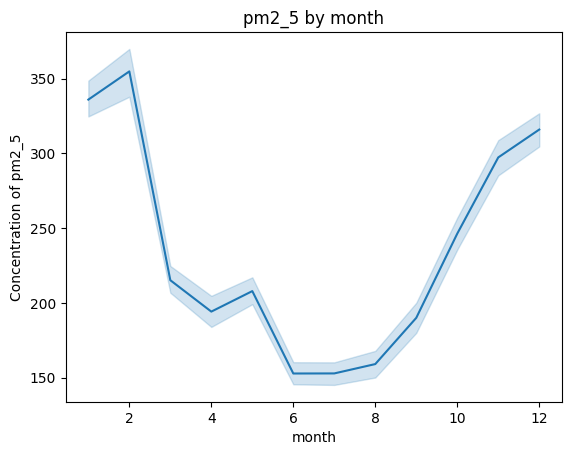

minimum value 152.69997983870968 at 6
maximum value 354.82876461988303 at 2


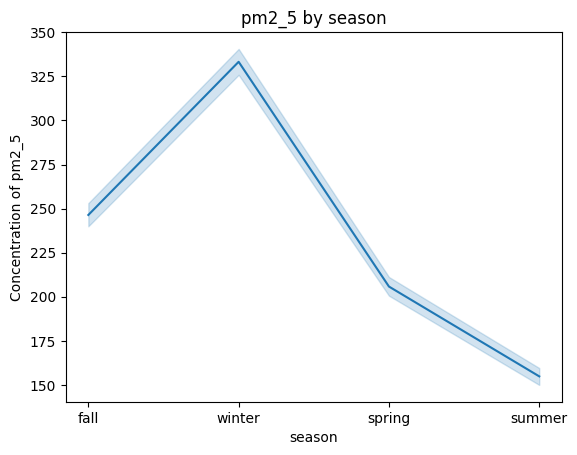

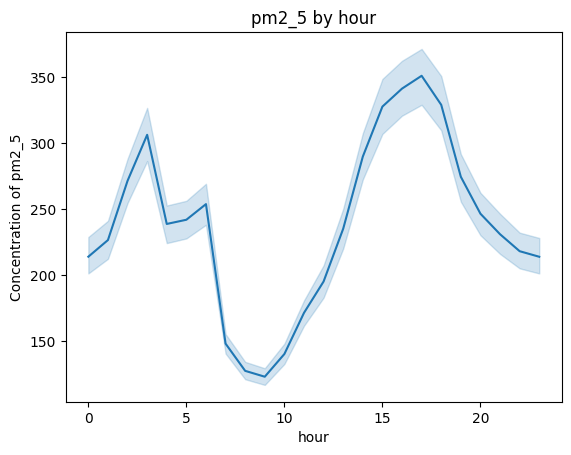

minimum value 122.79737851662405 at 9
maximum value 351.17350383631714 at 17
****************************************************************************************************


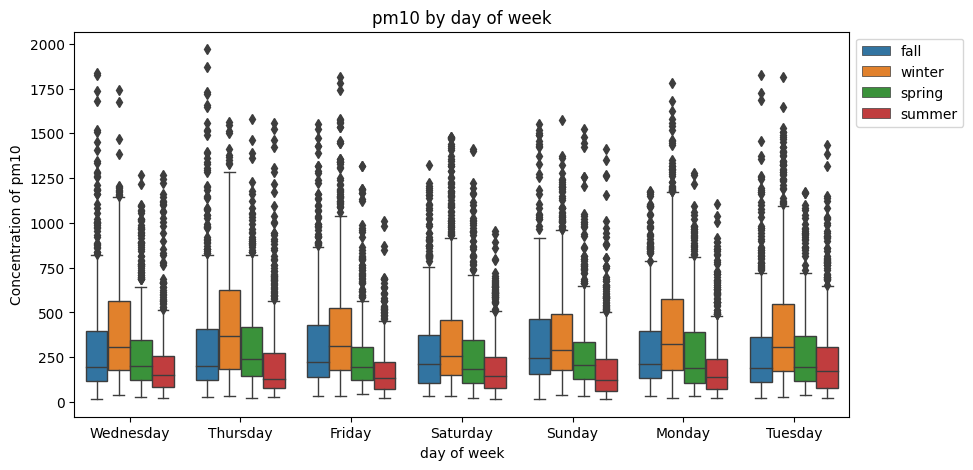

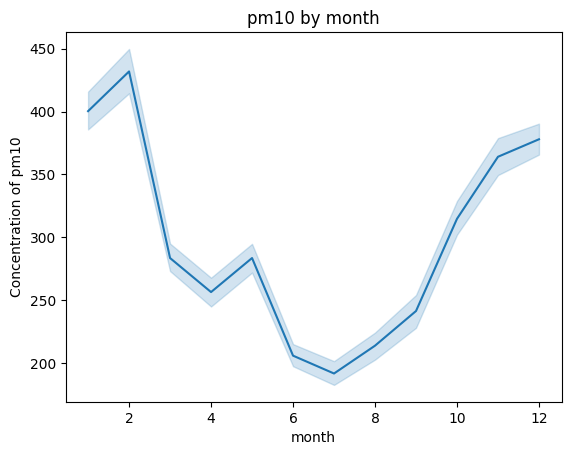

minimum value 191.6127755376344 at 7
maximum value 431.93499269005844 at 2


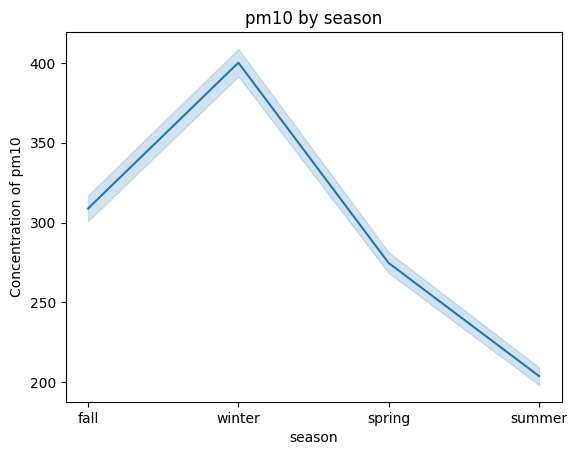

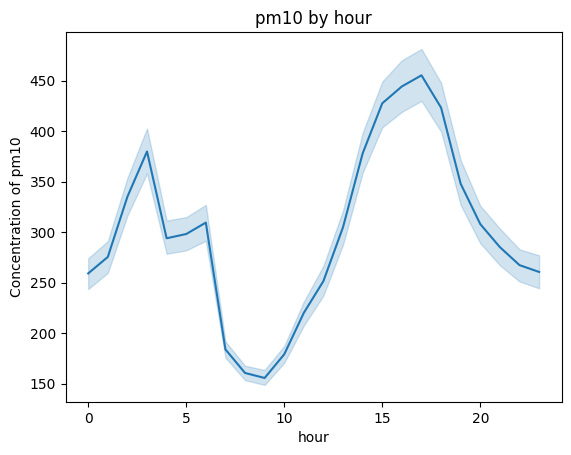

minimum value 155.51161125319695 at 9
maximum value 455.2302046035806 at 17
****************************************************************************************************


In [36]:
# let's visualize some graphics for pollutants

def visualize(pollutant):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(data = data,
            x='weekday',
            y=pollutant,
            hue='seasons',
            ax=ax,
            linewidth=1
            )
    ax.set_title(f'{pollutant} by day of week')
    ax.set_xlabel('day of week')
    ax.set_ylabel(f"Concentration of {pollutant}")
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()
    
    sns.lineplot(x='month', y=pollutant, data=data)
    plt.title(f'{pollutant} by month')
    plt.xlabel('month')
    plt.ylabel(f'Concentration of {pollutant}')
    plt.show()
    mean_month = data.groupby('month')[pollutant].mean().sort_values()
    print(f'minimum value {mean_month.min()} at {mean_month.index[0]}')
    print(f'maximum value {mean_month.max()} at {mean_month.index[-1]}')
    
    
    sns.lineplot(x='seasons', y=pollutant, data=data)
    plt.title(f'{pollutant} by season')
    plt.xlabel('season')
    plt.ylabel(f'Concentration of {pollutant}')
    plt.show()
    
    sns.lineplot(x='hour', y=pollutant, data=data)
    plt.title(f'{pollutant} by hour')
    plt.xlabel('hour')
    plt.ylabel(f'Concentration of {pollutant}')
    plt.show()
    mean_hour = data.groupby('hour')[pollutant].mean().sort_values()
    print(f'minimum value {mean_hour.min()} at {mean_hour.index[0]}')
    print(f'maximum value {mean_hour.max()} at {mean_hour.index[-1]}')
    
    print('*'*100)

for pollutant in data.columns[:7]:
    visualize(pollutant)

Mean absolute error for linear regression co is 521.8606409760768
Mean absolute error for gradient boosting co is 382.24135613546673


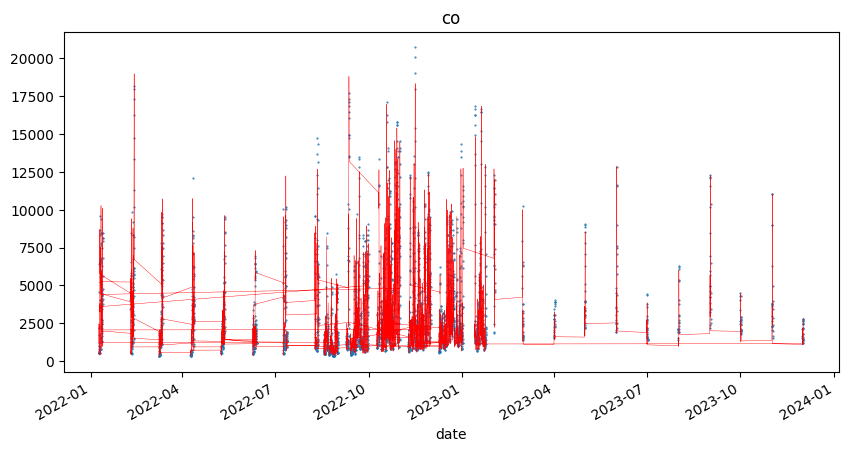

****************************************************************************************************
Mean absolute error for linear regression no is 17.816021281507457
Mean absolute error for gradient boosting no is 10.184371596690982


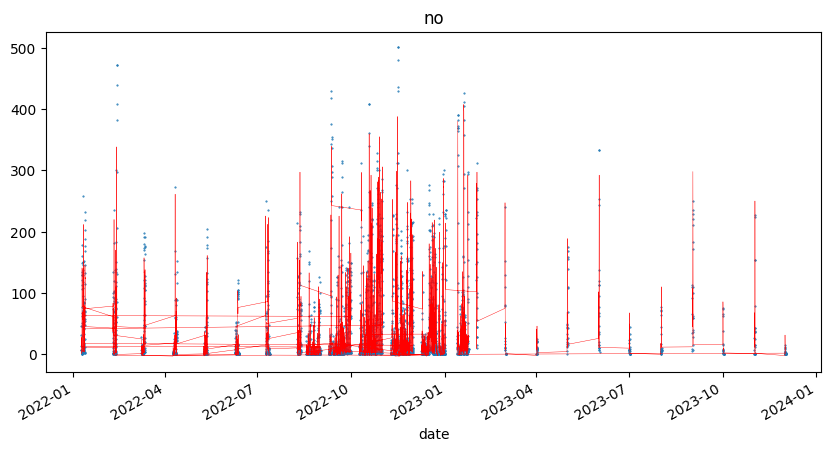

****************************************************************************************************
Mean absolute error for linear regression no2 is 18.147284145650598
Mean absolute error for gradient boosting no2 is 10.935880244821378


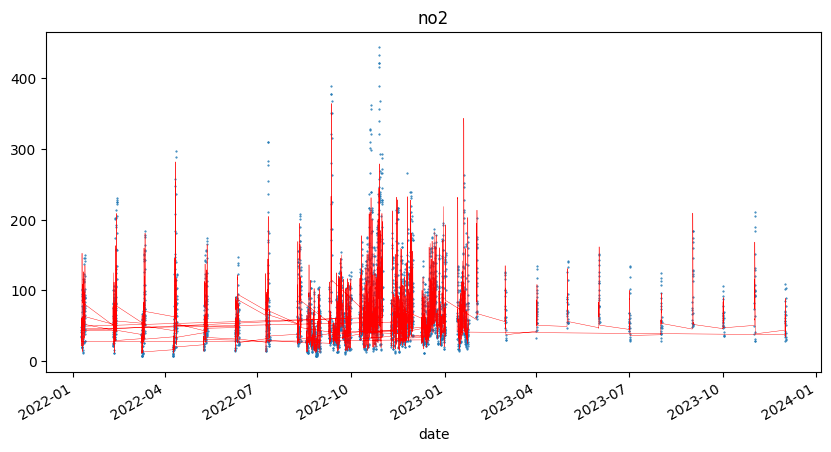

****************************************************************************************************
Mean absolute error for linear regression o3 is 43.68502241305239
Mean absolute error for gradient boosting o3 is 23.856437407939765


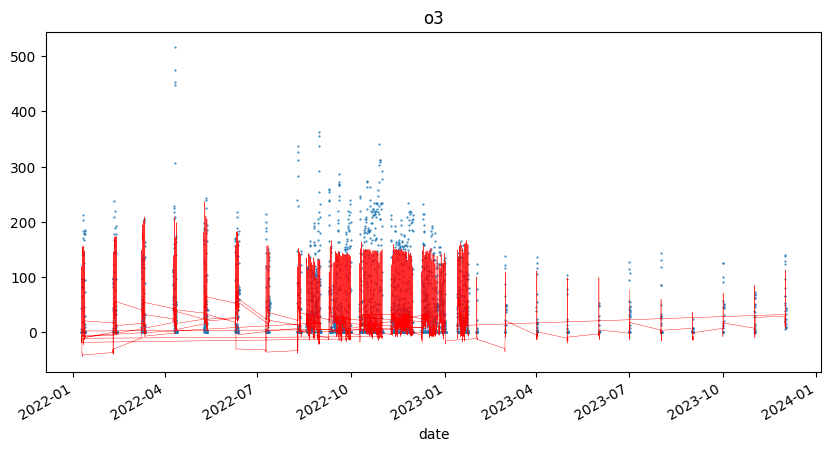

****************************************************************************************************
Mean absolute error for linear regression so2 is 25.130351996501325
Mean absolute error for gradient boosting so2 is 20.874156861228208


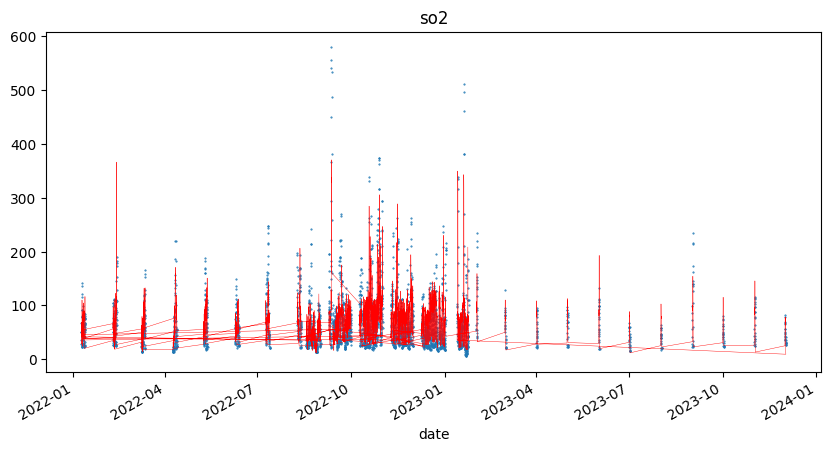

****************************************************************************************************
Mean absolute error for linear regression pm2_5 is 58.93187884517424
Mean absolute error for gradient boosting pm2_5 is 45.83732355328728


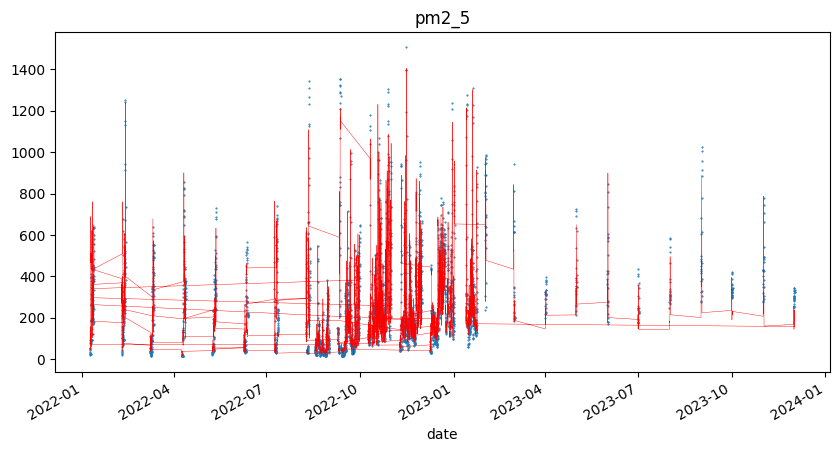

****************************************************************************************************
Mean absolute error for linear regression pm10 is 57.227107087031854
Mean absolute error for gradient boosting pm10 is 49.42635086243979


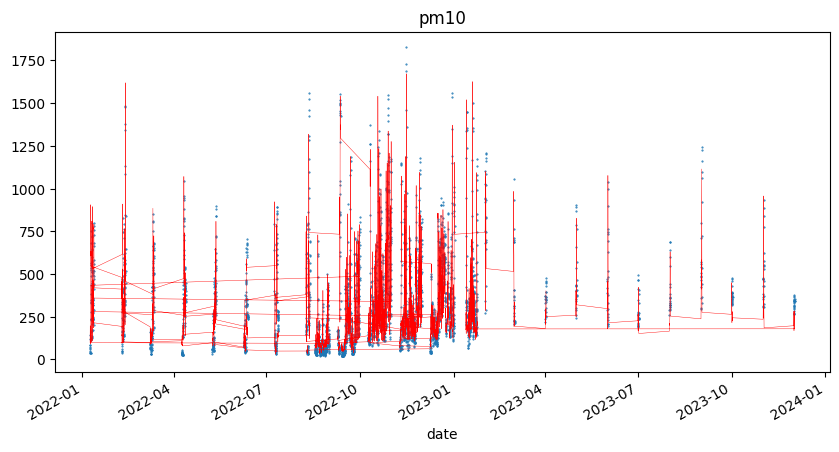

****************************************************************************************************


In [37]:
# let's build linear regression and gradien boosting models and make graphics for theь

import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

# function for removing correlated features
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    
                    

    

    
def calculating(pollutant):
    
    # making one-hot-encoding for seasons mean-target-encoding for weekday columns
    mean_weekday = data.groupby('weekday')[pollutant].mean()
    data_new = data.copy()
    data_new['weekday'] = data_new['weekday'].map(mean_weekday)
    ohe = pd.get_dummies(data_new['seasons'], prefix='seasons', drop_first=True)
    data_new = pd.concat((data_new.drop('seasons', axis=1), ohe), axis=1)
    
    #dividing our data
    X = data_new.drop(pollutant, axis=1)
    y = data_new[pollutant]
         
    # removing correlated features
    correlation(X, 0.7)
    
    # making time related validation
    splitter = TimeSeriesSplit(n_splits=4)
    for train_index, test_index in splitter.split(X):
        X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)], y[len(train_index): (len(train_index)+len(test_index))]
        
    # making linear regression model and calculating MAE
    linear_pipe = Pipeline([
        ('sc', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])
    linear_pipe.fit(X_train, y_train)
    print(f'Mean absolute error for linear regression {pollutant} is', mean_absolute_error(y_test, linear_pipe.predict(X_test)))
        
    # making gradient boosting model and calculating MAE
    xgb = GradientBoostingRegressor()
    xgb.fit(X_train, y_train)
    print(f'Mean absolute error for gradient boosting {pollutant} is', mean_absolute_error(y_test, xgb.predict(X_test)))
    
    # calculating predicted values with best model
    if mean_absolute_error(y_test, xgb.predict(X_test)) < mean_absolute_error(y_test, linear_pipe.predict(X_test)):
        predicts = xgb.predict(X_test)
    else:
        predicts = linear_pipe.predict(X_test)    
        
    predicts = pd.Series(predicts, index = y_test.index)
    
    # visualizing real and predicted values
    plt.figure(figsize=(15, 10))
    y_test.plot(figsize=(10,5), title=pollutant, style=".", ms=1)
    plt.plot(predicts, color='r', linewidth=0.3)
    plt.title(pollutant)
    plt.show()
    print("*"*100)
    
    
    
for pollutant in data.columns[:7]:
    calculating(pollutant)